In [6]:
import emcee
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt

In [90]:
with open('q_results_220308.pkl','rb') as f:
    data = pkl.load(f)

In [91]:
data.shape

(100, 2200, 1)

In [92]:
warmup = 200
data = data[:,warmup:,:]
data = data.reshape((100,-1))
data.shape

(100, 2000)

In [94]:
def stat(z,p=True):
    if p: print(f'n = {z.shape[0]}, mean = {np.mean(z):0.3}, std = {np.std(z):0.3}')
    return np.mean(z), np.std(z)

In [95]:
stat(data.flatten())

n = 200000, mean = 0.77, std = 0.0128


(0.7700358202664074, 0.012809214440717928)

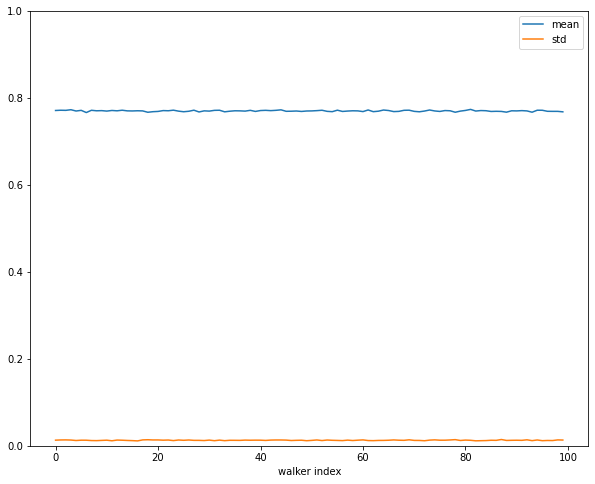

In [96]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(100),[stat(data[i],False)[0] for i in range(100)],label='mean')
plt.plot(np.arange(100),[stat(data[i],False)[1] for i in range(100)],label='std')
plt.ylim([0,1])
plt.xlabel('walker index')
plt.legend()
plt.show()

In [97]:
taus = []
for x in data:
    try:
        t = emcee.autocorr.integrated_time(x)[0]
        taus.append(t)
    except:
        pass
np.mean(taus)

23.391595477653574

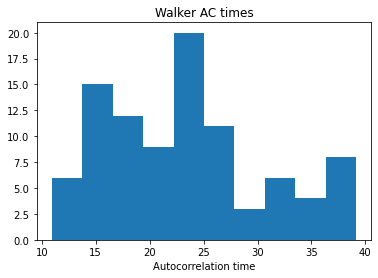

In [98]:
plt.hist(taus)
plt.xlabel('Autocorrelation time')
plt.title('Walker AC times')
plt.show()

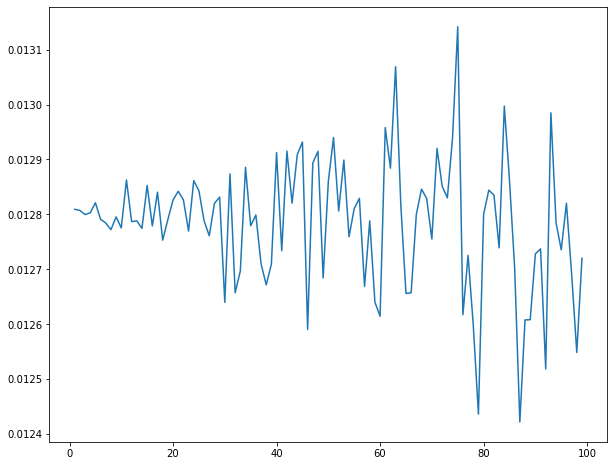

In [99]:
plt.figure(figsize=(10,8))
plt.plot(range(1,100),[stat(data[:,0:2200:i].flatten(),False)[1] for i in range(1,100)])
plt.show()

In [102]:
np.mean([stat(data[:,0:2200:i].flatten(),False)[1] for i in range(1,100)])

0.012785071138106289

In [100]:
y = data[0]

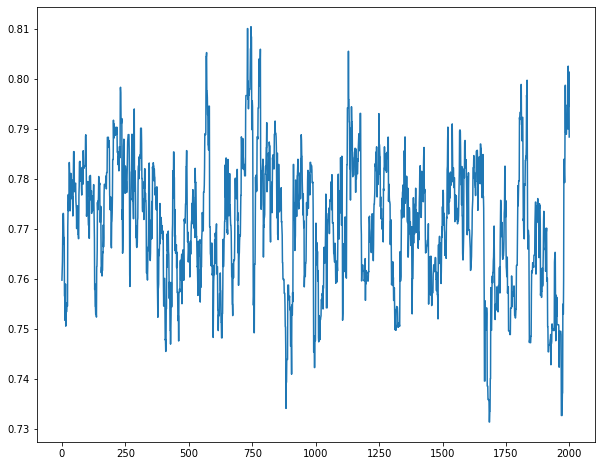

In [101]:
plt.figure(figsize=(10,8))
plt.plot(y)
plt.show()